# **Aula 13** - Redes Neurais em PLN
## Objetivos: ##
- Implementar uma Rede Neural Recorrente (RNN) simples em Python para prever a próxima palavra em uma sequência de texto, utilizando a biblioteca TensorFlow/Keras.
- Implementar uma Rede Long Short-Term Memory (LSTM) em Python para classificar o sentimento de frases como "positivo" ou "negativo", utilizando a biblioteca TensorFlow/Keras.


### Passo 1: Configuração do Ambiente no Google Colab ###


In [1]:
# Importar bibliotecas necessárias
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


### Passo 2: Preparação do Conjunto de Dados ###

In [2]:
# Conjunto de dados de treinamento (pequeno e simplificado)
textos_treinamento = [
"eu gosto de programar em python",
"python é uma linguagem poderosa",
"programar é divertido com python",
"aprenda python e seja feliz",
"gosto de aprender coisas novas"
]

print(f"Textos de treinamento: {textos_treinamento}")

Textos de treinamento: ['eu gosto de programar em python', 'python é uma linguagem poderosa', 'programar é divertido com python', 'aprenda python e seja feliz', 'gosto de aprender coisas novas']


In [3]:
# Inicializar o Tokenizer
tokenizer = Tokenizer()
# Construir o vocabulário a partir dos textos
tokenizer. fit_on_texts(textos_treinamento)
# Converter textos em sequências de números
sequencias = tokenizer.texts_to_sequences(textos_treinamento)
# Imprimir o vocabulário e as sequências geradas print(f"\nVocabulário (palavra: índice): (tokenizer.word_index}*)
print (f"Sequências numéricas dos textos: {sequencias}")
# Calcular o tamanho do vocabulário (+1 para incluir o 0 de padding)
total_palavras = len(tokenizer.word_index) + 1
print(f"Tamanho total do vocabulário: {total_palavras}")

Sequências numéricas dos textos: [[6, 2, 3, 4, 7, 1], [1, 5, 8, 9, 10], [4, 5, 11, 12, 1], [13, 1, 14, 15, 16], [2, 3, 17, 18, 19]]
Tamanho total do vocabulário: 20


In [4]:
# Preparar Entradas (X) e Saidas (y) para a previsão da proxima palavra
# a entrada (X) será uma sequência de palavras, e a saída (y) será a palavra seguinte.
# Determinar o comprimento máximo das sequências para padding
max_comprimento = max(len(seq) for seq in sequencias)
print(f"\nComprimento máximo das sequências antes do padding: {max_comprimento}")

# Criar pares de entrada (sequência parcial) e saída (próxima palavra)
# Ex: "eu gosto de programar" -> "em"
# "gosto de programar em" -> "python"
entradas_X = []
saidas_y = []

for seq in sequencias:
  for i in range(1, len(seq)) :
    entradas_X.append(seq[:i]) # A sequência até a palavra atual
    saidas_y.append(seq[i]) # A proxima palavra

print(f"Exemplo de entradas_X (parcial): {entradas_X[0:5]}")
print(f"Exemplo de saidas_y (parcial): {saidas_y[0:5]}")

# Padronizar o comprimento das sequências de entrada
# Todas as sequências de entrada precisam ter o mesmo comprimento para a RNN
entradas_X_padded = pad_sequences (entradas_X, maxlen=max_comprimento -1, padding='pre')

# O maxlen é "max_comprimento - 1' porque a saída 'y' é a última palavra, então x sempre terá 1 palavra a menos.
# Converter as saídas para o formato one-hot encoding
# Isso é necessário para a camada de saída da RNN (softmax)
saidas_y_one_hot = tf.keras.utils.to_categorical(saidas_y, num_classes=total_palavras)

print(f"\nExemplo de entradas_X_padded (após padding e truncagem): \n{entradas_X_padded[0:5]}")
print(f"Exemplo de saidas_y_one_hot (após one-hot encoding): \n{saidas_y_one_hot [0:5]}")
print(f"Formato final das entradas (X): {entradas_X_padded. shape}")
print(f"Formato final das saídas (y): {saidas_y_one_hot.shape}")


Comprimento máximo das sequências antes do padding: 6
Exemplo de entradas_X (parcial): [[6], [6, 2], [6, 2, 3], [6, 2, 3, 4], [6, 2, 3, 4, 7]]
Exemplo de saidas_y (parcial): [2, 3, 4, 7, 1]

Exemplo de entradas_X_padded (após padding e truncagem): 
[[0 0 0 0 6]
 [0 0 0 6 2]
 [0 0 6 2 3]
 [0 6 2 3 4]
 [6 2 3 4 7]]
Exemplo de saidas_y_one_hot (após one-hot encoding): 
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Formato final das entradas (X): (21, 5)
Formato final das saídas (y): (21, 20)


### Passo 3: Construção do Modelo RNN ###

In [5]:
# 1. Definindo o modelo
# Definir a arquitetura do modelo RNN
modelo_rnn = Sequential ()
# Camada de Embedding:
# total_palavras: tamanho do vocabulário
# 10: dimensão do vetor de embedding (quantas características queremos para cada palavra)
# input_length: comprimento das sequências de entrada (maxlen - 1)
modelo_rnn. add (Embedding(total_palavras, 10, input_length=entradas_X_padded.shape [1]))
# Camada SimpleRNN:
# 32: número de unidades (neurônios) na camada recorrente. Este é o tamanho do estado oculto.
modelo_rnn.add (SimpleRNN(32))
# Camada Densa de Saída:
# total _palavras: número de neurônios de saída (um para cada palavra no vocabulário)
# activation='softmax': função de ativação para probabilidade (soma 1 para todas as palavras)
modelo_rnn. add (Dense(total_palavras, activation='softmax'))
# Compilar o modelo
modelo_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Exibir um resumo da arquitetura do modelo
modelo_rnn. summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Passo 4: Treinamento do Modelo ###

In [6]:
# Treinando o modelo
print("\nIniciando o treinamento do modelo RNN...")
modelo_rnn. fit(entradas_X_padded, saidas_y_one_hot, epochs=100, verbose=1)
# epochs: quantas vezes o modelo verá todo o conjunto de dados
# verbose: 1 para mostrar o progresso do treinamento
print ("Treinamento concluído!")


Iniciando o treinamento do modelo RNN...
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.0476 - loss: 2.9911
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.0476 - loss: 2.9819
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.0952 - loss: 2.9728
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.1905 - loss: 2.9637
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.1905 - loss: 2.9546
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.1905 - loss: 2.9454
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.1429 - loss: 2.9361
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.1905 - loss: 2.9265
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.2857 - loss: 2.9167
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3333 - loss: 2.9067
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3333 - loss: 2.8963
Epoch 12/100
1/1 ━━━━━━━━━━

### Passo 5: Usar o Modelo para Previsão ###

In [7]:
# 1. Função de Previsão:
def prever_proxima_palavra(modelo, tokenizer, max_seq_len, texto_base):
  """
  Prevê a próxima palavra dado um texto base.
  """
  # Converter o texto base para sequência numérica
  sequencia_numerica = tokenizer. texts_to_sequences ([texto_base])[0]

  # Padronizar o comprimento da sequência de entrada (precisa ter o mesmo formato que o treinamento)
  # Atenção: max seq_len deve ser o comprimento que as *entradas* foram pad_ sequenciadas
  sequencia_padded = pad_sequences ([sequencia_numerica], maxlen=max_seq_len, padding='pre')

  # Fazer a previsão
  previsao_probabilidades = modelo.predict (sequencia_padded, verbose=0) [0]

  # Obter o índice da palavra com a maior probabilidade
  indice_palavra_prevista = np.argmax(previsao_probabilidades)

  # Converter o índice de volta para a palavra
  for palavra, indice in tokenizer.word_index.items():
    if indice == indice_palavra_prevista:
      return palavra
  return None # Caso a palavra não seja encontrada (improvável com o vocabulário ajustado)

  # Comprimento de entrada esperado pelo modelo
  # entradas_X_padded. shape[1] é o maxlen que usamos no pad_sequences para X
  comprimento_entrada_modelo = entradas_X_padded.shape [1]

  # Testar o modelo com novas frases
  print("\n--- Testando o Modelo RNN ---")

  texto_teste_1 = "eu gosto de"
  proxima_1 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_1)
  print(f"Texto: '{texto_teste_1}' -› Próxima palavra prevista: '{proxima_1}'")

  texto_teste_2 = "python é uma"
  proxima_2 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_2)
  print(f"Texto: '{texto_teste_2}' -> Próxima palavra prevista: '{proxima_2}'")

  texto_teste_3 = "programar é divertido"
  proxima_3 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_3)
  print(f"Texto: '{texto_teste_3}' -> Próxima palavra prevista: '{proxima_3}'")

  texto_teste_4 = "aprenda python e"
  proxima_4 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_4)
  print(f"Texto: '{texto_teste_4}' -> Próxima palavra prevista: '{proxima_4}'")

  # Exemplo com palavra fora do vocabulário (ou sequência que o modelo nunca viu antes) texto teste 5 = "o sol brilha no" # Palavras "sol" e "brilha" não estão no vocabulário
  proxima_5 = prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_5)
  print(f"Texto: '{texto_teste_5}' -> Próxima palavra prevista: '{proxima_5}' (Pode ser inesperada devido a palavras desconhecidas)")

### 4.2 Implementação: Modelo de Rede Neural Rede Long Short-Term Memory ###
#### Passo 1: Configuração do Ambiente e Importação de Bibliotecas ####

In [8]:
# Importar bibliotecas necessárias
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


#### Passo 2: Preparação do Conjunto de Dados de Análise de Sentimentos ####

In [9]:
# Definir o Conjunto de Dados (Frases e Rótulos) para análise de sentimentos
dados_sentimento = [
  ("este filme é ótimo e divertido", "positivo"),
  ("eu adorei o livro, muito bom", "positivo"),
  ("gostei muito da atuação dos atores", "positivo"),
  ("o roteiro é fraco e chato", "negativo"),
  ("não recomendo este péssimo produto", "negativo"),
  ("uma perda de tempo horrível", "negativo"),
  ("ótimo trabalho, parabéns", "positivo"),
  ("terrível experiência, nunca mais", "negativo"),
  ("excelente serviço, muito eficiente", "positivo"),
  ("que decepção, muito ruim", "negativo"),
  ("aprendizagem de máquina é fascinante", "positivo"),
  ("pln é um campo interessante", "positivo"),
  ("este software travou várias vezes", "negativo"),
  ("a interface é confusa e difícil", "negativo"),
  ("o aplicativo é super útil e rápido", "positivo")
]

textos = [dado[0] for dado in dados_sentimento]
sentimentos = [dado[1] for dado in dados_sentimento]
print(f"Total de frases: {len(textos)}")
print(f"Exemplo de textos: {textos[:3]}")
print(f"Exemplo de sentimentos: {sentimentos [:3]}")

# Mapear Sentimentos para Números: converter "positivo" e "negativo" para 0 e 1.
mapeamento_sentimento = {'negativo': 0, 'positivo': 1}
rotulos_numericos = np.array([mapeamento_sentimento[s] for s in sentimentos])

print(f"\nSentimentos mapeados para números: {rotulos_numericos}")

# Tokenização de Texto
tokenizer = Tokenizer (num_words=None, oov_token="<unk>")
# num words=None para pegar todo o vocabulário
# oov_token para palavras desconhecidas

tokenizer.fit_on_texts(textos)
sequencias_numericas = tokenizer.texts_to_sequences (textos)
total_palavras_vocab = len(tokenizer.word_index) + 1 # +1 para o ® de padding/00V

print(f"\nVocabulário (palavra: indice): {tokenizer.word_index}")
print(f"Sequências numéricas das frases: {sequencias_numericas}")
print(f"Tamanho total do vocabulário: {total_palavras_vocab}")

# Padronizar o comprimento das sequências
# Encontrar o comprimento da frase mais longa para padronizar
max_len = max(len(s) for s in sequencias_numericas)
print(f"\nComprimento máximo das sequências: {max_len}")
sequencias_padded = pad_sequences (sequencias_numericas, maxlen=max_len, padding='post') # 'post' para adicionar zeros no final
print(f"sequências após padding: \n{sequencias_padded}")

# Dividir os dados em conjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(
  sequencias_padded, rotulos_numericos, test_size=0.2, random_state=42, stratify=rotulos_numericos
)

print(f"\nShape de X_treino: {X_treino.shape}")
print (f"shape de X_teste: {X_teste.shape}")
print(f"Shape de y_treino: {y_treino.shape}")
print(f"Shape de y_teste: {y_teste.shape}")

Total de frases: 15
Exemplo de textos: ['este filme é ótimo e divertido', 'eu adorei o livro, muito bom', 'gostei muito da atuação dos atores']
Exemplo de sentimentos: ['positivo', 'positivo', 'positivo']

Sentimentos mapeados para números: [1 1 1 0 0 0 1 0 1 0 1 1 0 0 1]

Vocabulário (palavra: indice): {'<unk>': 1, 'é': 2, 'e': 3, 'muito': 4, 'este': 5, 'o': 6, 'ótimo': 7, 'de': 8, 'filme': 9, 'divertido': 10, 'eu': 11, 'adorei': 12, 'livro': 13, 'bom': 14, 'gostei': 15, 'da': 16, 'atuação': 17, 'dos': 18, 'atores': 19, 'roteiro': 20, 'fraco': 21, 'chato': 22, 'não': 23, 'recomendo': 24, 'péssimo': 25, 'produto': 26, 'uma': 27, 'perda': 28, 'tempo': 29, 'horrível': 30, 'trabalho': 31, 'parabéns': 32, 'terrível': 33, 'experiência': 34, 'nunca': 35, 'mais': 36, 'excelente': 37, 'serviço': 38, 'eficiente': 39, 'que': 40, 'decepção': 41, 'ruim': 42, 'aprendizagem': 43, 'máquina': 44, 'fascinante': 45, 'pln': 46, 'um': 47, 'campo': 48, 'interessante': 49, 'software': 50, 'travou': 51, 'vár

#### Passo 3: Construção do Modelo LSTM ####

In [10]:
# Definir a arquitetura do modelo LST™
modelo_lstm = Sequential()

# Camada de Embedding: Converte os índices numéricos das palavras em vetores densos.
# total_palavras _vocab: tamanho do vocabulário
# 50: dimensão do vetor de embedding (pode ser ajustado)
# input_length: comprimento padronizado das sequências (max_len)
modelo_lstm.add (Embedding(total_palavras_vocab, 50, input_length=max_len))

# Camada LSTM:
# 64: número de unidades (neurônios) na camada LSTM. Define o tamanho do estado oculto e da célula de memória.
# dropou: Um tipo de regularização para evitar overfitting (descarta aleatoriamente neurônios durante o treinamento) .
# recurrent_dropout: Dropout aplicado nas conexões recorrentes da LSTM.
modelo_lstm.add (LSTM(64, dropout=0.2, recurrent_dropout=0.2))

# Camada Densa de Saida:
# 1: Um único neurônio de saída, pois é um problema de classificação binária (positivo/negativo).
# activation='sigmoid': Função de ativação para classificação binária (produz um valor entre 0 e 1).
modelo_lstm.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
modelo_lstm. compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Exibir um resumo da arquitetura do modelo
modelo_lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#### Passo 4: Treinamento e Avaliação do Modelo ####

In [11]:
# Treinar o modelo
print("\nIniciando o treinamento do modelo LSTM...")
historico = modelo_lstm.fit(
    X_treino, y_treino,
    epochs=50,
    batch_size=2,
    validation_split=0.1,
    verbose=1
)
print("Treinamento concluído!")


Iniciando o treinamento do modelo LSTM...
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 0.5417 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6961
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6236 - loss: 0.6899 - val_accuracy: 0.5000 - val_loss: 0.6978
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5556 - loss: 0.6862 - val_accuracy: 0.5000 - val_loss: 0.6992
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7931 - loss: 0.6840 - val_accuracy: 0.5000 - val_loss: 0.7008
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.6733 - val_accuracy: 0.5000 - val_loss: 0.7055
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.6614 - val_accuracy: 0.5000 - val_loss: 0.7125
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.6376 - val_accuracy: 0.5000 - val_loss: 0.7277
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.599


Acurácia do modelo no conjunto de teste: 33.33%
Perda do modelo no conjunto de teste:  2.2664
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 992ms/step

--- Relatório de Classificação ---
              precision    recall  f1-score   support

    negativo       0.00      0.00      0.00         1
    positivo       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3


--- Matriz de Confusão ---


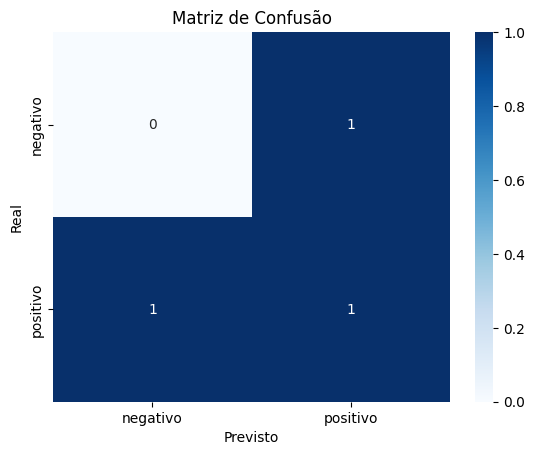

In [12]:
# Avalia o modelo no conjunto de teste
perda, acuracia = modelo_lstm.evaluate(X_teste, y_teste, verbose=0)

print(f"\nAcurácia do modelo no conjunto de teste: {acuracia*100:.2f}%")
print(f"Perda do modelo no conjunto de teste: {perda: .4f}")

# Fazer previsões no conjunto de teste
y_pred_prob = modelo_lstm.predict(X_teste)
y_pred_classes = (y_pred_prob > 0.5).astype(int) # Converter probabilidades para 0 ou 1
print("\n--- Relatório de Classificação ---")
print(classification_report(y_teste, y_pred_classes, target_names=['negativo', 'positivo']))
print("\n--- Matriz de Confusão ---")
cm = confusion_matrix(y_teste, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[ 'negativo', 'positivo'], yticklabels=['negativo', 'positivo'])
plt.xlabel('Previsto')
plt.ylabel ('Real')
plt.title('Matriz de Confusão')
plt.show()

#### Passo 5: Testar o Modelo com Novas Frases ####

In [14]:
# utilizando o modelo treinado
def prever_sentimento(modelo, tokenizer, max_seq_len, frase_nova, mapeamento_sentimento):
  """"
  Prevê o sentimento de uma nova frase.
  """
  # Converter a frase para sequência numérica
  sequencia_numerica = tokenizer.texts_to_sequences([frase_nova])

  # Se a frase tem palavras desconhecidas, o tokenizer pode retornar uma lista vazia ou valores 0
  if not sequencia_numerica:
    print(f"Aviso: A frase '{frase_nova}' contém apenas palavras desconhecidas.")
    return "Desconhecido" # Ou outra indicação

  sequencia_numerica = sequencia_numerica[0] # Pega a primeira (e única) sequência

  # Padronizar o comprimento da sequência de entrada
  sequencia_padded = pad_sequences ([sequencia_numerica], maxlen=max_seq_len, padding= 'post')

  # Fazer a previsão (probabilidade)
  probabilidade_positiva = modelo.predict(sequencia_padded, verbose=0) [0][0]

  # Inverter o mapeamento para obter o nome do sentimento
  mapeamento_inverso = {v: k for k, v in mapeamento_sentimento.items()}

  # Classificar com base no limiar de 0.5
  if probabilidade_positiva >= 0.5:
    return mapeamento_inverso[1] # 'positivo'
  else:
    return mapeamento_inverso[0] # 'negativo'

# Testar o modelo com novas frases
print("\n--- Testando o Modelo LSTM com Novas Frases ---")

frase_nova_1 = "gostei muito do filme, excelente!"
sentimento_1 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_1, mapeamento_sentimento)
print(f"Frase: '{frase_nova_1}' -> Sentimento previsto: '{sentimento_1}'")

frase_nova_2 = "odiei o livro, muito entediante"
sentimento_2 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_2, mapeamento_sentimento)
print(f"Frase: '{frase_nova_2}' -> Sentimento previsto: '{sentimento_2}'")

frase_nova_3 = "a aula de pin é ótima"
sentimento_3 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_3, mapeamento_sentimento)
print(f"Frase: '{frase_nova_3}' -> Sentimento previsto: '{sentimento_3}'")

frase_nova_4 = "o atendimento foi péssimo"
sentimento_4 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_4, mapeamento_sentimento)
print(f"Frase: '{frase_nova_4}' -> Sentimento previsto: '{sentimento_4}'")

frase_nova_5 = "esse produto não vale a pena, é caro"
sentimento_5 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_5, mapeamento_sentimento)
print(f"Frase: '(frase_nova_5)' -> Sentimento previsto: '{sentimento_5}'")

frase_nova_6 = "o filme é legal" # Frase curta e ambígua para um modelo pequeno
sentimento_6 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_6, mapeamento_sentimento)
print(f"Frase: '{frase_nova_6}' -> Sentimento previsto: '{sentimento_6}'")

frase_nova_7 = "isso é horrível, que tristeza"
sentimento_7 = prever_sentimento(modelo_lstm, tokenizer, max_len, frase_nova_7, mapeamento_sentimento)
print(f"Frase: '{frase_nova_7}' -> Sentimento previsto: '{sentimento_7}'")



--- Testando o Modelo LSTM com Novas Frases ---
Frase: 'gostei muito do filme, excelente!' -> Sentimento previsto: 'positivo'
Frase: 'odiei o livro, muito entediante' -> Sentimento previsto: 'positivo'
Frase: 'a aula de pin é ótima' -> Sentimento previsto: 'positivo'
Frase: 'o atendimento foi péssimo' -> Sentimento previsto: 'negativo'
Frase: '(frase_nova_5)' -> Sentimento previsto: 'negativo'
Frase: 'o filme é legal' -> Sentimento previsto: 'negativo'
Frase: 'isso é horrível, que tristeza' -> Sentimento previsto: 'positivo'
